# Исследование интернет-магазина «Стримчик»

В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  <br/>  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

###  Откроем файл с данными и изучим общую информацию

**Установим библиотеки, которые могут нам понадобиться в работе**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

Теперь загрузим датасет и посмотрим общую информацию о нем

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/games.csv')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
-------------------------------------------


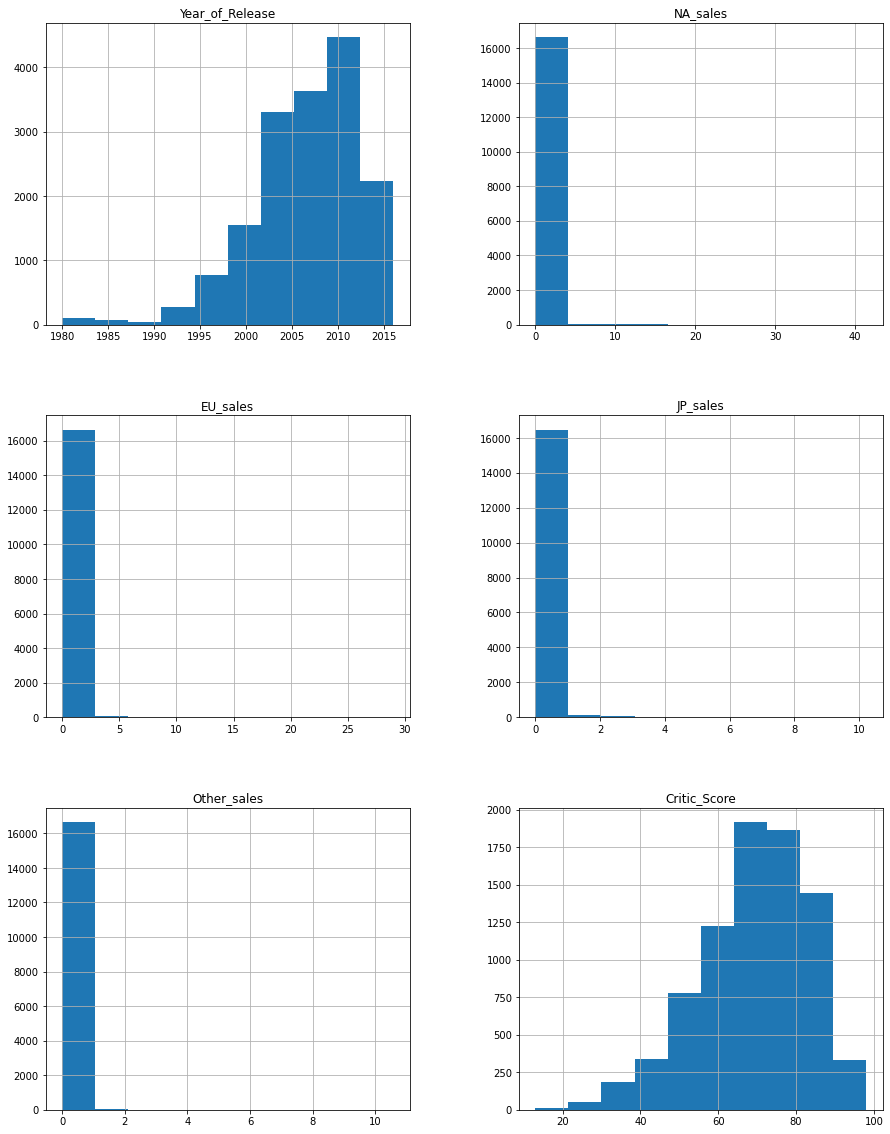

In [3]:
def show_info(df_name):  # создадим функцию, которая покажет всю общую информацию о датасете
    display(df.head(10))
    print('-------------------------------------------')
    print(df.info())
    print('-------------------------------------------')
    df.hist(figsize=(15, 20));
        
show_info(df)

**Вывод:**
Итак, перед нами датасет из 11 колонок и 16715 строк. Мы видим, практически сразу, что в нем есть пустые значения во многих столбцах, а также неверные форматы. 

### Подготовка данных

In [4]:
df.columns = df.columns.str.lower() # приведем названия столбцов к нижнему регистру
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.isna().sum() # посмотрим количество пропущенных значений в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
df.query('name.isna()') # найдем данные у которых нет информации о названии и жанре

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df = df[~df['name'].isna()] # удалим данные строчки, т.к. они не представляют ценности для исследования

In [8]:
df.query('year_of_release.isna()') # посмотрим на пропуски в данных по годам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как мы видим из данных с пропусками по годам, во многих из них нет информации о продажах (продажи равны нулю). В названиях некоторых игр присутсвуют года, но заполнить год релиза корректно не представляется возможно. Т.к. мы не знаем когда именно вышла игра. Например, "FIFA Soccer 2004" могла выйти в 2003 или 2004, или 2005, если в ней сезон 2004-2005. Однозначного и точного ответа нет. Нужна дополнительная информация. Но поскольку количествотаких данных с пустым годом релиза и непонятными продажами невелико, то их можно проигнорировать и удалить.

In [9]:
df = df[~df['year_of_release'].isna()] # также удалим строчки с пустыми данными о годе выпуска игры. Количество таких строк невелико, поэтому на выводы они повлиять не смогут.

In [10]:
df.shape

(16444, 11)

Теперь рассмотрим данные в столбце `user_score`. Стобцец имеет неверный формат. И в нем помимо пустых значений присутствует значение **'tbd'**.  Оно означает "To Be Determined", т.е. **"будет определено"**. Времени с момента релиза игр прошло достаточно, поэтому данное значение стоит заменить. Но заменить на "NaN", т.к. точной информации о рейтинге нет, а присвоить значения критиков - некорректно.

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'NaN' # заменим значения 'tbd' на 'NaN'

In [13]:
df['user_score'].unique() # как мы видим 'tbd' исчезли из датасета

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'NaN', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
df['user_score'] = df['user_score'].astype(float) # исправим тип данных на float
df['year_of_release'] = df['year_of_release'].astype(int) # а у значений года исправим тип данных на int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # создадим столбец с суммарными продажами по всем регионам

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [19]:
df.duplicated().sum() # проверим на ниличие явных дубликатов

0

In [20]:
df.loc[df.duplicated(subset=['name', 'platform']) == True] # в парах есть неявные дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


In [21]:
df.query('name == "Need for Speed: Most Wanted" or name == "Madden NFL 13"') # сформируем срез по дубликатам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.00,0.17,81.0,5.8,E,2.85
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.00,0.03,NaN,7.3,E,0.50


Как мы видим для игры Need for Speed: Most Wanted на X360 и PC существуют дубликаты, но у дубликатов другие даты выхода. Возможно речь идет о переизданиях игр. Если так, то удалять эти строки из датасета нельзя, т.к. речь идет по сути о другой игре. Игре в которую были внесены изменения и игре у которой есть своя статистика продаж и оценок. Но что касается Madden NFL 13, то здесь можно сделать правки и сложить значения строк, т.к. вся основная информация идентична.

In [22]:
df.shape

(16444, 12)

In [23]:
df = df.drop(index=16230) # удалим лишнюю строку

In [24]:
df.shape

(16443, 12)

In [25]:
df.loc[604,'eu_sales'] = 0.23 # заменим значения в ячейках суммарными значениями из двух строк
df.loc[604,'sum_sales'] = 2.57

In [26]:
df.loc[604, ] # проверим замену значений. Все корректно.

name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
rating                         E
sum_sales                   2.57
Name: 604, dtype: object

**Вывод:**
Мы привели значения в столбцах в правильные форматы. Добавили новый столбец с суммарными продажами по всем регионам. Заполнили пустые значения в столбцах, сохранив основной массив данных. Единственное рейтинг от Entertainment Software Ratings Board, который указан в соответствующем столбце, имеет много пропусков (пустых значений). Заполнить пропуски не представляется возможным, т.к. это частное мнение компании и недостаточно данных для присвоения рейтинга. Возможно если бы у нас был средний возраст игрока или список тегов для конкретной игры, то мы бы могли представить примерный рейтинг. Но таких данных у нас нет. Причинами пропусков мог стать человеческий фактор, т.е. ответственный специалист не заполнял пользовательский рейтинг или рейтинг критиков, например. Или технический сбой при формировании выгрузки, когда к данным не подтянулись рейтинги и оценки. Возможно в разных таблицах БД игры называются по-разному.

### Исследовательский анализ данных

/tmp/ipykernel_161/2961582211.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="crest");


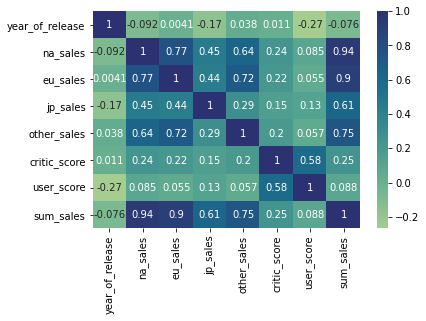

In [27]:
sns.heatmap(df.corr(), annot=True, cmap="crest");

Построив тепловую карту корреляции значений в датасете, мы увидим, что оценки критиков, как и оценки пользователей, имеют слабую корреляцию с продажами во всех регионах без исключения. И это логично, ведь прежде чем оставить отзыв или оценку критик или пользователь должен поиграть в игру, а до этого неплохо было бы ее купить. 

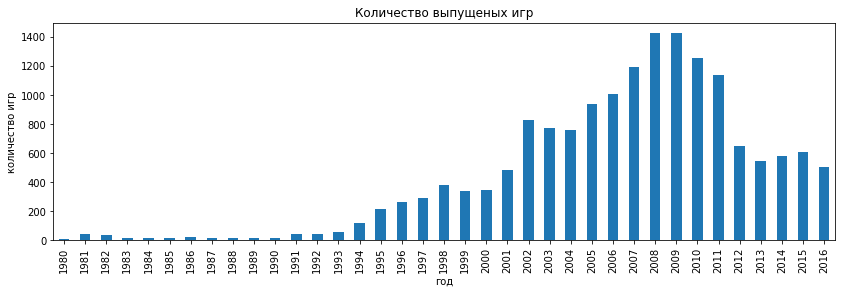

In [28]:
df.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize=(14, 4), title='Количество выпущеных игр')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()

In [29]:
df1 = df[~df.duplicated(subset=['name', 'year_of_release'])] # фильтруем записи по годам и названиям без дубликатов
df1.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


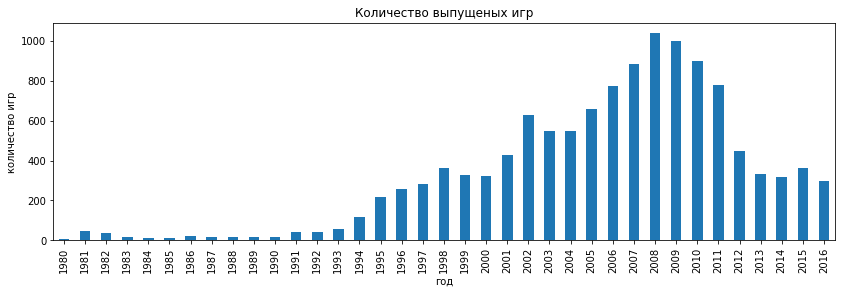

In [30]:
df1.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize=(14, 4), title='Количество выпущеных игр')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()

In [31]:
df.query('year_of_release < 1995').shape[0]

486

Как видно из графика рост числа игр наблюдается с 1995 года. Своих пиковых значений показатель достигает в 2008-2009 годах, после чего начинается падение. Для нашего исследования мы оставим данные только после 1995 года, т.к. число игр выпускаемых в прежние годы крайне незначительно.

In [32]:
df = df[~(df['year_of_release'] < 1995)] # удаляем данные старше 1995 года

In [33]:
rate_plat = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)
rate_plat.index[:5].tolist() # определим топ-5 платформ по суммарным продажам за все время

['PS2', 'X360', 'PS3', 'Wii', 'DS']

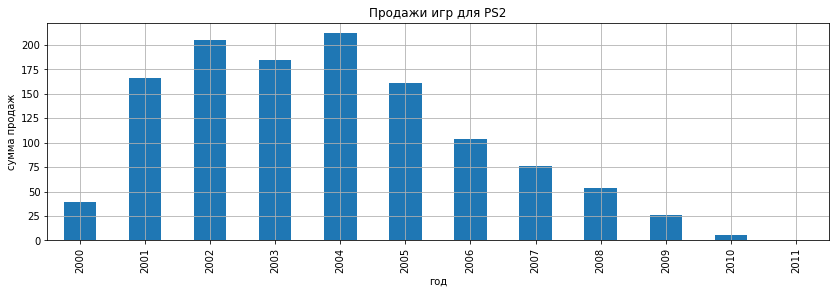

In [35]:
df[df['platform']=='PS2'].groupby('year_of_release')['sum_sales'].agg('sum').\
    plot(kind='bar', grid=True, figsize=(14, 4), title='Продажи игр для PS2')

plt.xlabel('год')
plt.ylabel('сумма продаж')
plt.show()

Одной из самых популярных платформ была PS2. С момента появления в 2000 году наблюдается взрывной рост продаж игр для жанной приставки. Максимального значения продажи достигают в 2004 году. После начинается спад.

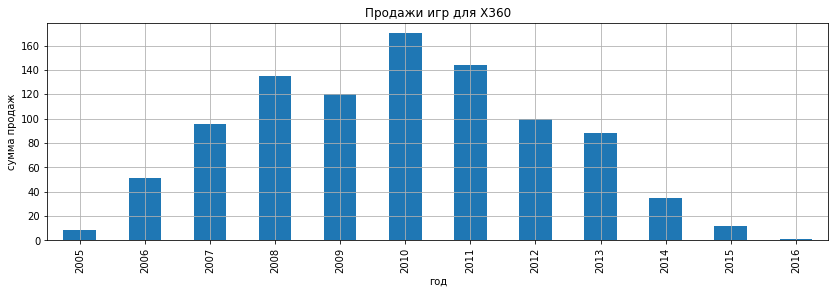

In [39]:
df[df['platform']=='X360'].groupby('year_of_release')['sum_sales'].agg('sum').\
    plot(kind='bar', grid=True, figsize=(14, 4), title='Продажи игр для X360')

plt.xlabel('год')
plt.ylabel('сумма продаж')
plt.show()

С момента появления в 2005 году активно продавались игры для приставки Xbox360. В 2010 году суммарный объем продаж игр превысил 160 миллионов. После 2010 года начался спад продаж.

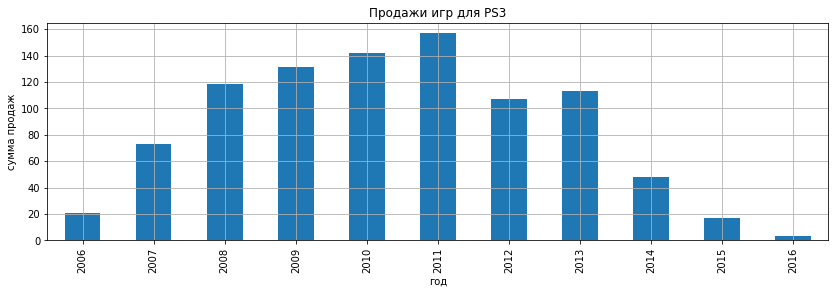

In [40]:
df[df['platform']=='PS3'].groupby('year_of_release')['sum_sales'].agg('sum').\
    plot(kind='bar', grid=True, figsize=(14, 4), title='Продажи игр для PS3')

plt.xlabel('год')
plt.ylabel('сумма продаж')
plt.show()

В 2006 году начинается рост продаж игр для приставки PS3. Этот рост продолжается до 2011 года, а после следует спад. Динамика продаж PS3 схожа с динамикой ее прямого конкурента Xbox360. При этом мы можем наблюдать в сравнении как падают продажи приставки PS2 по сравнению с приставкой нового поколения PS3 и ростом продаж игр для нее. Т.о. мы можем наблюдать цикл технического обновления, который приблизительно равен 4-ем годам.

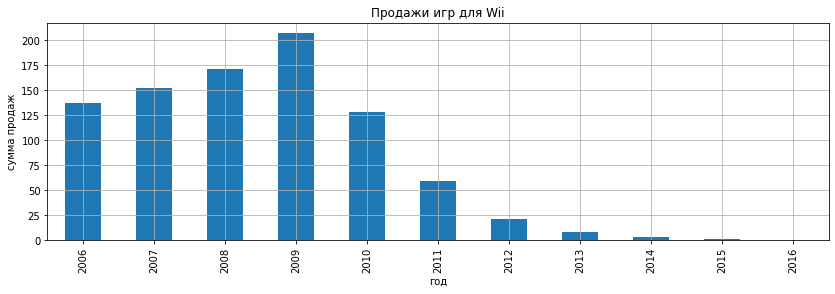

In [41]:
df[df['platform']=='Wii'].groupby('year_of_release')['sum_sales'].agg('sum').\
    plot(kind='bar', grid=True, figsize=(14, 4), title='Продажи игр для Wii')

plt.xlabel('год')
plt.ylabel('сумма продаж')
plt.show()

В 2006 году также начались продажи игр для приставки Wii. Рост продаж игр для нее можно наблюдать с 2006 по 2009 год. После начинается резкий спад. Спад настолько сильный, что с 2009 года, когда продажи превысили 200 миллионов, через 8 лет в 2016 году суммарные продажи игр не превысили 1 миллиона.

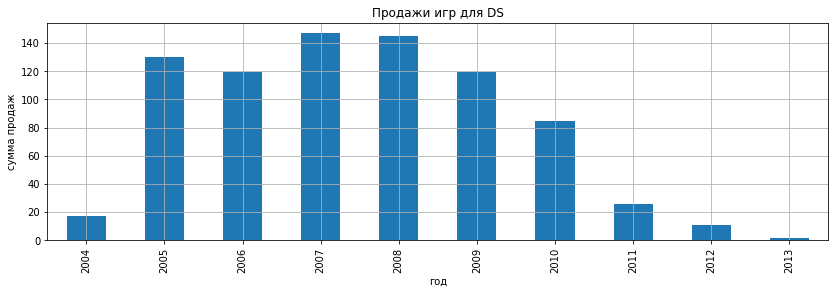

In [42]:
df[df['platform']=='DS'].groupby('year_of_release')['sum_sales'].agg('sum').\
    plot(kind='bar', grid=True, figsize=(14, 4), title='Продажи игр для DS')

plt.xlabel('год')
plt.ylabel('сумма продаж')
plt.show()

Продажи игр для DS показали взрывной рост в 2005 году и по 2009 год не падали ниже уровня в 120 миллионов. Но после, как и для платформы Wii, начался спад. После 2013 года продажи не фиксируются вовсе.

In [43]:
#  создадим массив данных о суммарных продажах по годам и платформам
data = df.pivot_table(index=['year_of_release'], columns=['platform'], values=['sum_sales'], aggfunc=['sum'], dropna=True)

data = data.reset_index().droplevel(1, axis=1)

# оставим только данные за последние 5 лет. Т.к. у нас данные до 2016 года и технологический цикл равен 4-ем годам
data = data[~(data['year_of_release'] < 2012)] 

# удалим столбцы с пустыми значениями
data = data.dropna(axis=1, how='all') 

data = data.reset_index().droplevel(0, axis=1)

# придадим таблице нормальный вид и переименуем столбцы
data.columns = ['index', 'year_of_release', '3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'] 

# информацию о платформах, по которым небыло продаж последние три года или продажи были минимальными
data = data.drop(columns=['index', 'DS', 'PSP', 'Wii']) 
data

,year_of_release,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
0,2012,51.36,23.22,107.36,NaN,16.19,17.56,99.74,NaN
1,2013,56.57,12.38,113.25,25.99,10.59,21.65,88.58,18.96
2,2014,43.76,13.28,47.76,100.00,11.90,22.03,34.74,54.07
3,2015,27.78,8.52,16.82,118.90,6.25,16.35,11.96,60.14
4,2016,15.14,5.25,3.60,69.25,4.25,4.60,1.52,26.15


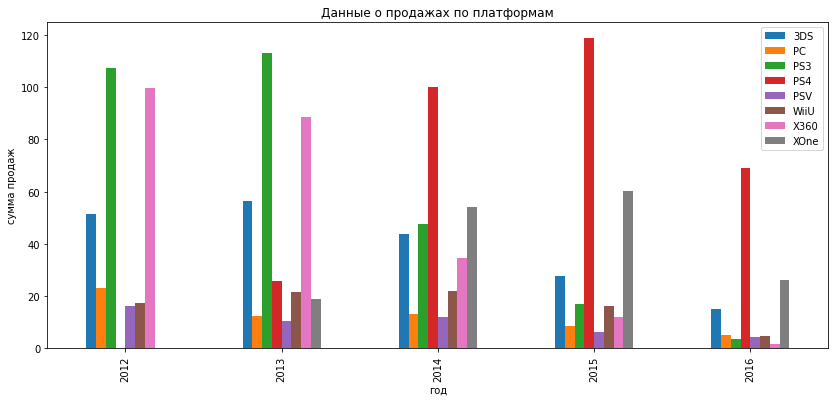

In [44]:
# построим динамику продаж по основным платформам
data.plot(kind='bar', x='year_of_release', figsize=(14, 6), title='Данные о продажах по платформам') 

plt.xlabel('год')
plt.ylabel('сумма продаж')
plt.show()

Основываясь на данных, отображенных на диаграмме продаж, наиболее перспективными платформами являются PS4 и XOne. Это не удивительно, т.к. данные платформы являются платформами нового поколения. В это же время продажи игр на других (старых) платформах снижаются.

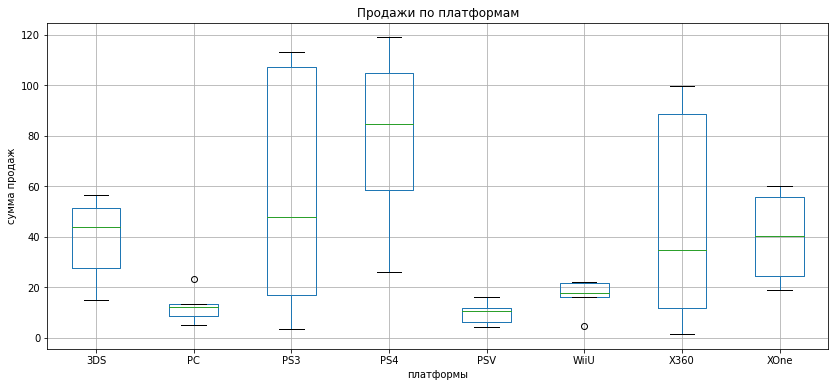

In [45]:
data.boxplot(column=['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne'], figsize=(14, 6))

plt.title('Продажи по платформам')
plt.xlabel('платформы')
plt.ylabel('сумма продаж')
plt.show()

Как видно из графика наибольшее медианное значение по продажам игр имеет платформа PS4. За расматриваемы период в пять лет медианная средняя была около 85 миллионов. Приэтом межквартильный размах демонстрирует разброс 50% значений в пределах от 59 до 105 миллионов. Опять же взглянув на графики платформ PS3 и X360 мы увидим смещение медианы ближе к первому квартилю, что лишний раз подчеркивает снижение продаж игр для данных платформ. 

In [46]:
# оставим только данные за последние 5 лет. Т.к. у нас данные до 2016 года и технологический цикл равен 4-ем годам
df2 = df[~(df['year_of_release'] < 2012)]

Рассмотрим, как влияют оценки критиков и пользователей на продажи игр, на примере платформы PS4.

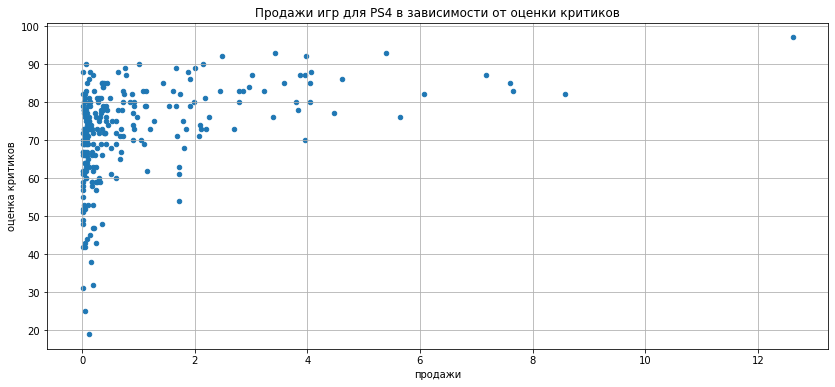

In [47]:
df2[df2['platform']=='PS4'].sort_values('sum_sales').\
    plot(x='sum_sales', y='critic_score', grid=True, figsize=(14, 6), kind='scatter')

plt.title('Продажи игр для PS4 в зависимости от оценки критиков')
plt.xlabel('продажи')
plt.ylabel('оценка критиков')
plt.show()

In [48]:
print('Корреляция между продажами и оценкой критиков равна:', round(df2['critic_score'].corr(df2['sum_sales']), 2))

Корреляция между продажами и оценкой критиков равна: 0.31


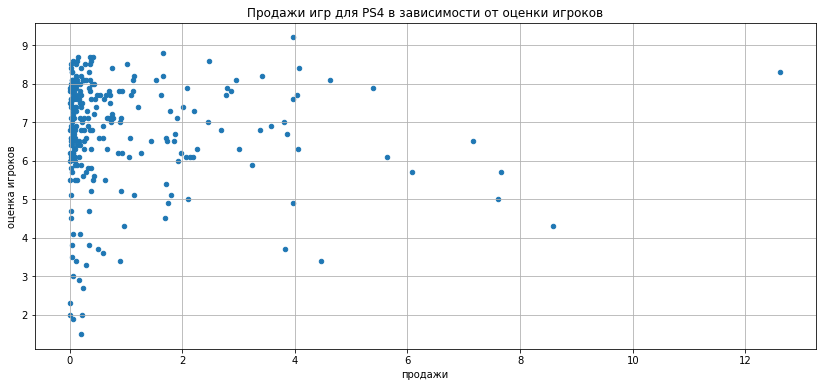

In [49]:
df2[df2['platform']=='PS4'].sort_values('sum_sales').\
    plot(x='sum_sales', y='user_score', grid=True, figsize=(14, 6), kind='scatter')

plt.title('Продажи игр для PS4 в зависимости от оценки игроков')
plt.xlabel('продажи')
plt.ylabel('оценка игроков')
plt.show()

In [50]:
print('Корреляция между продажами и оценкой игроков равна:', round(df2['user_score'].corr(df2['sum_sales']), 3))

Корреляция между продажами и оценкой игроков равна: 0.004


Как мы можем наблюдать корреляция между оценкой игроков или критиков и продажей игр очень слабая. В первом случае она составляет 0.004, а во втором 0.31. Скорее всего наше умозаключение, высказанное ранее, о том, что прежде чем оставить оценку игре ее нужно сначала купить, оказалось верным. Графики рассеяния это еще раз подтвердили.

Рассмотрим, как влияют оценки критиков и пользователей на продажи игр, на примере платформы X360.

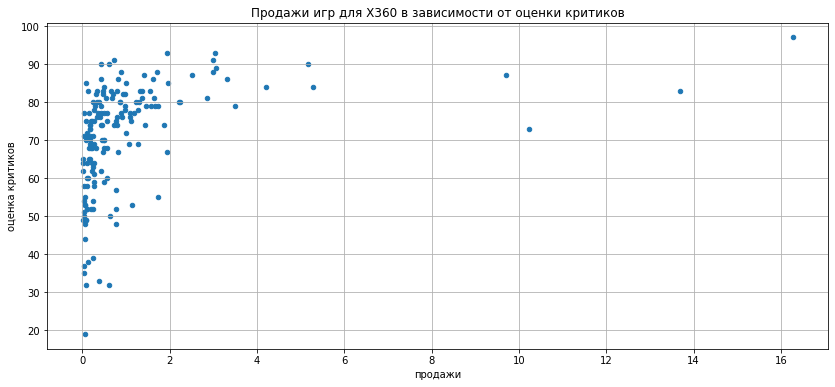

In [51]:
df2[df2['platform']=='X360'].sort_values('sum_sales').\
    plot(x='sum_sales', y='critic_score', grid=True, figsize=(14, 6), kind='scatter')

plt.title('Продажи игр для X360 в зависимости от оценки критиков')
plt.xlabel('продажи')
plt.ylabel('оценка критиков')
plt.show()

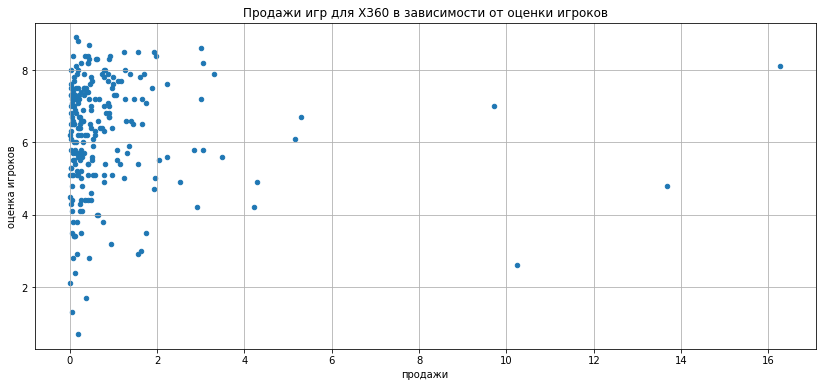

In [52]:
df2[df2['platform']=='X360'].sort_values('sum_sales').\
    plot(x='sum_sales', y='user_score', grid=True, figsize=(14, 6), kind='scatter')

plt.title('Продажи игр для X360 в зависимости от оценки игроков')
plt.xlabel('продажи')
plt.ylabel('оценка игроков')
plt.show()

Рассматривая графики рассеяния для платформы X360 можно обнаружить тоже распределение, что и для PS4. Оценки критиков и пользователей крайне слабо влияют на продажи.

Для того чтобы окончательно удостовериться проверим еще одну платформу - PC.

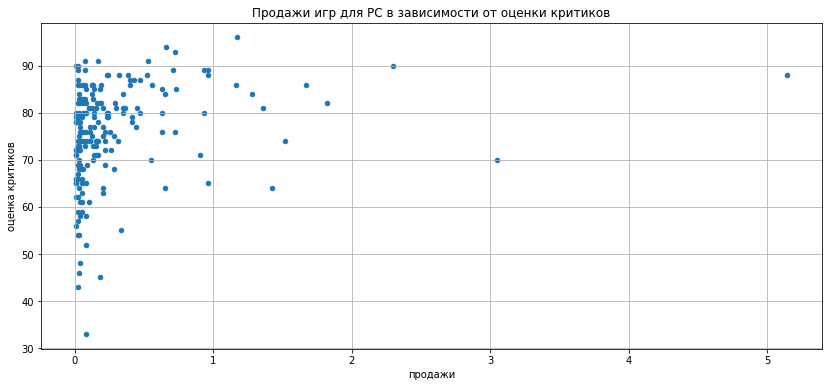

In [53]:
df2[df2['platform']=='PC'].sort_values('sum_sales').\
    plot(x='sum_sales', y='critic_score', grid=True, figsize=(14, 6), kind='scatter')

plt.title('Продажи игр для PC в зависимости от оценки критиков')
plt.xlabel('продажи')
plt.ylabel('оценка критиков')
plt.show()

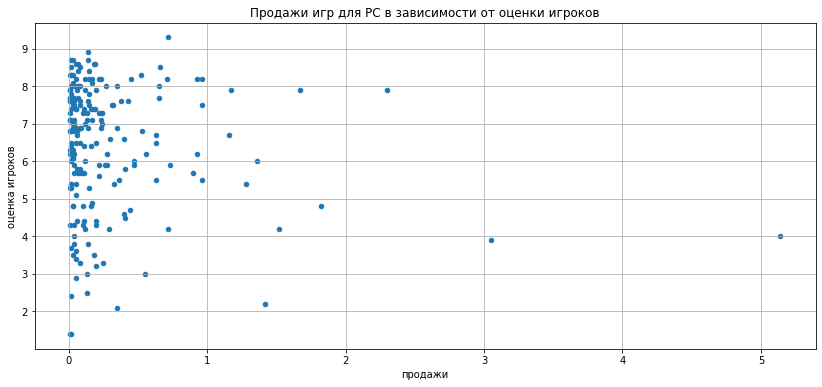

In [54]:
df2[df2['platform']=='PC'].sort_values('sum_sales').\
    plot(x='sum_sales', y='user_score', grid=True, figsize=(14, 6), kind='scatter')

plt.title('Продажи игр для PC в зависимости от оценки игроков')
plt.xlabel('продажи')
plt.ylabel('оценка игроков')
plt.show()

Действительно имеем похожий результат как с X360, так и с PS4. Продажи не зависят от оценок.

Теперь изучим общее распределение игр по жанрам.

In [55]:
grouped = df2.groupby('genre')['sum_sales'].agg('median') # группируем по жанрам суммарные продажи
grouped.sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: sum_sales, dtype: float64

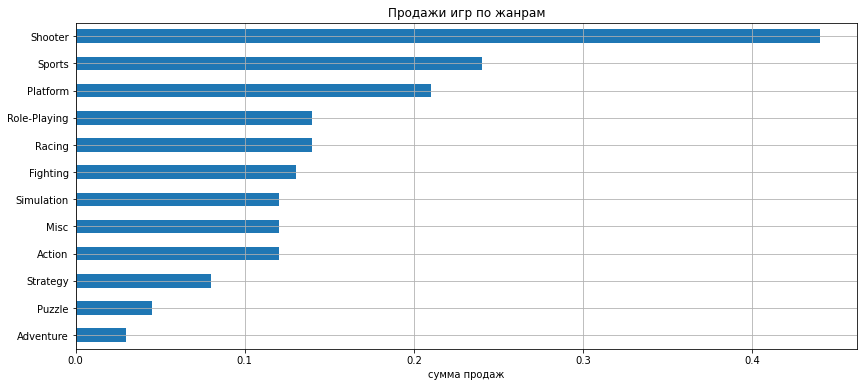

In [56]:
grouped.sort_values().plot(kind='barh', grid=True, figsize=(14, 6))

plt.title('Продажи игр по жанрам')
plt.xlabel('сумма продаж')
plt.ylabel(None)
plt.show()

Как мы видим из графика, существуют очень прибыльные жанры игр: Shooter, Sports, Platform, Role-Playing и Racing. Есть также и наименее прибыльные жанры. Ими являются: Adventure, Strategy и Puzzle.

**Вывод:**
Проведя исследовательский анализ данных, мы пришли к выводу, что оценки критиков, как и оценки пользователей, имеют слабую корреляцию с продажами во всех регионах без исключения. И это логично, ведь прежде чем оставить отзыв или оценку критик или пользователь должен поиграть в игру, а до этого неплохо было бы ее купить. Также выяснили, что наиболее перспективными платформами являются PS4 и XOne. И это не удивительно, т.к. данные платформы являются платформами нового поколения. Кроме того нам удалось установить самые прибыльные жанры игр. Ими стали - Shooter, Sports, Platform, Role-Playing и Racing.

### Портрет пользователя каждого региона

Прежде чем приступать к анализу нужно заполнить пропуски в столбце с рейтингами. Поскольку у нас нет данных рейтингов заменим пропуски на 'no_rating'.

In [57]:
df2['rating'] = df2['rating'].fillna('no_rating')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  sum_sales        2885 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.0+ KB


/tmp/ipykernel_161/3910928866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating'] = df2['rating'].fillna('no_rating')


**Определим предпочтения пользователей в NA.**

In [58]:
# найдем суммарные продажи по платформам
plat_na = df2.pivot_table(index=['platform'], values=['na_sales'], aggfunc=['sum']) 

# расчитаем доли в отдельном столбце
plat_na['percent'] = round(plat_na['sum']/plat_na['sum'].sum()*100, 2) 

plat_na = plat_na.reset_index().droplevel(1, axis=1)

# определим ТОП-5 платформ исходя из их доли в продажах игр
plat_na.sort_values(by='percent', ascending=False).head(5) 

,platform,sum,percent
9,X360,140.05,23.70
4,PS4,108.74,18.40
3,PS3,103.38,17.49
10,XOne,93.12,15.76
0,3DS,55.31,9.36


На первом месте в NA по продажам игр платформа X360. На нее приходится почти 23.7%. На втором месте PS4 c 18.4%. На третьем PS3 - 17.49%. Замыкает пятерку платформа 3DS с долей продаж равной 9.36%.

In [59]:
df2.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).head(5) # определим ТОП-5 жанров

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Самыми популярными жанрами в NA явялются: Action, Shooter, Sports, Role-Playing, Misc.

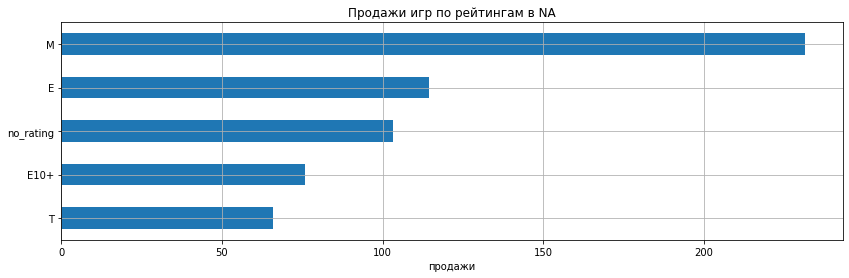

In [60]:
# найдем суммарные продажи по рейтингам
rating_na = df2.groupby('rating')['na_sales'].agg('sum') 

rating_na.sort_values().plot(kind='barh', grid=True, figsize=(14, 4), title='Продажи игр по рейтингам в NA')
plt.xlabel('продажи')
plt.ylabel(None)
plt.show()

В NA больше всего продаж приходилось на игры с категорией М (для лиц старше 17 лет), на втором месте Е (для всех), на третьем - игры без рейтинга.

**Определим предпочтения пользователей в EU.**

In [61]:
# найдем суммарные продажи по платформам
plat_eu = df2.pivot_table(index=['platform'], values=['eu_sales'], aggfunc=['sum']) 

# расчитаем доли в отдельном столбце
plat_eu['percent'] = round(plat_eu['sum']/plat_eu['sum'].sum()*100, 2) 

plat_eu = plat_eu.reset_index().droplevel(1, axis=1)

# определим ТОП-5 платформ исходя из их доли в продажах игр
plat_eu.sort_values(by='percent', ascending=False).head(5) 

,platform,sum,percent
4,PS4,141.09,27.84
3,PS3,106.86,21.08
9,X360,74.52,14.70
10,XOne,51.59,10.18
0,3DS,42.64,8.41


На первом месте в EU по продажам игр платформа PS4. На нее приходится 27.84%. На втором месте PS3 c 21.08%. На третьем X360 - 14.70%. 

In [62]:
df2.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).head(5) # определим ТОП-5 жанров

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Самыми популярными жанрами в EU явялются: Action, Shooter, Sports, Role-Playing, Racing.

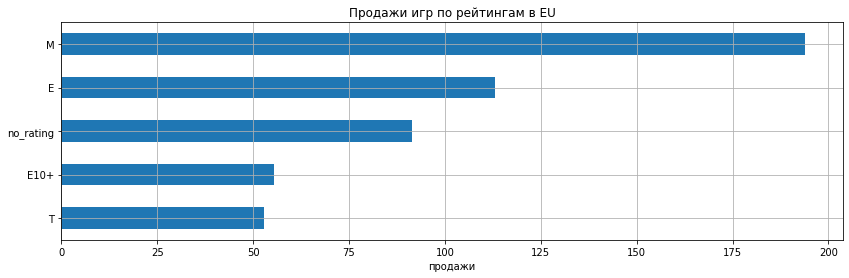

In [63]:
# найдем суммарные продажи по рейтингам
rating_eu = df2.groupby('rating')['eu_sales'].agg('sum') 

rating_eu.sort_values().plot(kind='barh', grid=True, figsize=(14, 4), title='Продажи игр по рейтингам в EU')
plt.xlabel('продажи')
plt.ylabel(None)
plt.show()

В EU больше всего продаж приходилось на игры с категорией М (для лиц старше 17 лет), на втором месте Е (для всех), на третьем - игры без рейтинга. Опять же, категории игр точно те же, что и в NA.

**Определим предпочтения пользователей в JP.**

In [64]:
# найдем суммарные продажи по платформам
plat_jp = df2.pivot_table(index=['platform'], values=['jp_sales'], aggfunc=['sum']) 

# расчитаем доли в отдельном столбце
plat_jp['percent'] = round(plat_jp['sum']/plat_jp['sum'].sum()*100, 2) 

plat_jp = plat_jp.reset_index().droplevel(1, axis=1)

# определим ТОП-5 платформ исходя из их доли в продажах игр
plat_jp.sort_values(by='percent', ascending=False).head(5) 

,platform,sum,percent
0,3DS,87.79,45.59
3,PS3,35.29,18.32
6,PSV,21.04,10.93
4,PS4,15.96,8.29
8,WiiU,13.01,6.76


На первом месте в JP по продажам игр платформа 3DS. На нее приходится 45.59%. На втором месте PS3 c 18.32%. На третьем PSV - 10.93%.

In [65]:
df2.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).head(5) # определим ТОП-5 жанров

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

Самыми популярными жанрами в JP явялются: Role-Playing, Action, Misc, Simulation, Fighting. Это сильно отличает регион от прочих.

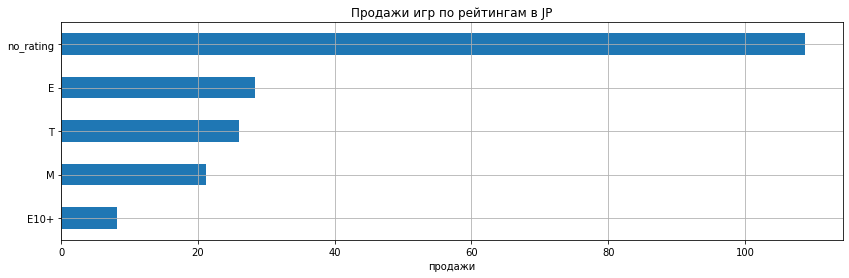

In [66]:
# найдем суммарные продажи по рейтингам
rating_jp = df2.groupby('rating')['jp_sales'].agg('sum') 

rating_jp.sort_values().plot(kind='barh', grid=True, figsize=(14, 4), title='Продажи игр по рейтингам в JP')
plt.xlabel('продажи')
plt.ylabel(None)
plt.show()

В JP больше всего продаж приходилось на игры без рейтинга, на втором месте с категорией Е (для всех), на третьем - Т (для подростков).

**Вывод:**
Изучив портреты пользователей в каждом регионе, мы можем заключить, что существуют различия во вкусах пользователей из разных регионов как в жанрах, так в платформах и рейтингах игр. В NA больше всего выпускается и продается игр для X360 от Microsoft, в то время как в JP предпочитают платформы от собственного гиганта - компании Sony. Предпочтения в жанрах тоже различаются. Если в NA предпочитают: Action, Shooter, Sports, Role-Playing, Misc, то в JP больше пользуются спросом игры жанров Role-Playing, Action, Misc, Simulation, Fighting.

### Проверка гипотез

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  sum_sales        2885 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.0+ KB


Перед проверкой гипотез мы видим, что в данных есть пропущенные значения. В частности пропуски есть в столбце `user_score`. Как говорит теория, при проверке гипотез и пропуски, и «заглушки» должны быть удалены.

In [68]:
df3 = df2[~(df2['user_score'].isna())]

In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1530 non-null   object 
 1   platform         1530 non-null   object 
 2   year_of_release  1530 non-null   int64  
 3   genre            1530 non-null   object 
 4   na_sales         1530 non-null   float64
 5   eu_sales         1530 non-null   float64
 6   jp_sales         1530 non-null   float64
 7   other_sales      1530 non-null   float64
 8   critic_score     1296 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           1530 non-null   object 
 11  sum_sales        1530 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 155.4+ KB


Проверим гипотезу о том, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** Тогда нулевая и альтернативная гипотезы будут выглядеть так: </br>  

H_0: Средний рейтинг пользователей (user_score) платформы XOne = Средний рейтинг пользователей (user_score) платформы PC </br>  
H_a: Средний рейтинг пользователей (user_score) платформы XOne ≠ Средний рейтинг пользователей (user_score) платформы PC</br>  
</br>  
Уровень значимости установим на значении 0.05, т.е. alpha = 0.05 .


In [71]:
user_score_xone = df3.loc[(df2['platform'] =='XOne'), 'user_score']
user_score_pc = df3.loc[(df2['platform'] =='PC'), 'user_score']

results = st.ttest_ind(user_score_xone, user_score_pc) # вызываем метод для проверки гипотезы

alpha = 0.05

print(results.pvalue) # выведем значение p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Использовав t-критерий Стьюдента, который применяется для проверки того, равны ли два средних значения совокупности, при уровне значимости равном 0.05, мы можем заключить, что предположение (средние пользовательские рейтинги платформ Xbox One и PC одинаковые) является вероятным и нулевую гипотезу не стоит отвергать.

Теперь проверим гипотезу о том, что **средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.** Тогда нулевая и альтернативная гипотезы будут выглядеть так: </br>  

H_0: Средний рейтинг пользователей (user_score) жанра Action = Средний рейтинг пользователей (user_score) жанра Sports </br>  
H_a: Средний рейтинг пользователей (user_score) жанра Action ≠ Средний рейтинг пользователей (user_score) жанра Sports </br>  
</br>  
Уровень значимости установим на значении 0.05, т.е. alpha = 0.05 .

In [72]:
user_score_action = df3.loc[(df['genre'] =='Action'), 'user_score']
user_score_sports = df3.loc[(df['genre'] =='Sports'), 'user_score']

results = st.ttest_ind(user_score_action, user_score_sports) # вызываем метод для проверки гипотезы

alpha = 0.05

print(results.pvalue) # выведем значение p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.8045233804629176e-26
Отвергаем нулевую гипотезу


**Вывод:** Использовав, как и в первом случае, t-критерий Стьюдента, который применяется для проверки того, равны ли два средних значения совокупности, при уровне значимости равном 0.05, мы можем сказать, что вероятность равенства средних рейтингов жанров мала. Она не превышает уровень значимости. Из этого следует, что вероятнее всего  средние пользовательские рейтинги жанров Action и Sports действительно разные.

### Общий вывод

В заключение исследования мы можем сделать следующие выводы:

1. _При обработке датасета мы столкнулись с большим количеством пропусков в данных. Причинами пропусков мог стать человеческий фактор, т.е. ответственный специалист не заполнял, например, пользовательский рейтинг или рейтинг критиков. Или был технический сбой при формировании выгрузки, когда к данным не подтянулись рейтинги и оценки. Возможно в разных таблицах БД игры называются по-разному._<br>  
<br>  
2. _Проведя исследовательский анализ данных, можно сказать, что оценки критиков, как и оценки пользователей, имеют слабую корреляцию с продажами во всех регионах без исключения. И это логично, ведь прежде чем оставить отзыв или оценку критик или пользователь должен поиграть в игру, а до этого ее нужно приобрести._<br>  
<br>  
3. _Мы также выяснили, что наиболее перспективными платформами являются PS4 и XOne. И это не удивительно, т.к. данные платформы являются платформами нового поколения. Кроме того нам удалось установить самые прибыльные жанры игр. Ими стали - Shooter, Sports, Platform, Role-Playing и Racing._<br>  
<br>  
4. _Изучив портреты пользователей в каждом регионе, мы можем заключить, что существуют различия во вкусах пользователей из разных регионов как в жанрах, так в платформах и рейтингах игр. В NA больше всего выпускается и продается игр для X360 от Microsoft, в то время как в JP предпочитают платформы от собственного гиганта - компании Sony. Предпочтения в жанрах тоже различаются. Если в NA предпочитают: Action, Shooter, Sports, Role-Playing, Misc, то в JP больше пользуются спросом игры жанров Role-Playing, Action, Misc, Simulation, Fighting._<br>  
<br>  
5. _Проверив гипотезы о равенстве средних значений пользовательского рейтинга, мы пришли к выводу, что вероятнее всего средние пользовательские рейтинги жанров Action и Sports различны, а средние рейтинги платформ Xbox One и PC вероятно совпадают._<br>  
<br>  

__В качестве общего итога отметим, что основываясь на полученой в результате исследования информации, интернет-магазину «Стримчик» для проведения рекламных кампаний стоит учитывать региональную специфику в предпочтениях жанров игр, а также стоит больше средств вкладывать в игры для приставок нового поколения Xbox и Playstation.__